In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


We start by extracting the tracks from the Spotify API using our previous scripts. I previously created an csv with the resulting data frame using the pandas library.

In [33]:
df = pd.read_csv('Radiohead.csv')
df.head()

,Unnamed: 0,artist,album_name,album_uri,track,release_date,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,song_uri,track_href,analysis_url,duration_ms,time_signature
0,0,Radiohead,KID A MNESIA,spotify:album:6ofEQubaL265rIW6WnCU8y,Everything In Its Right Place,2021-11-05,0.296,0.463,5,-11.412,...,0.0954,0.0629,123.943,audio_features,62dUmjtkYOUwYOALt6pefh,spotify:track:62dUmjtkYOUwYOALt6pefh,https://api.spotify.com/v1/tracks/62dUmjtkYOUw...,https://api.spotify.com/v1/audio-analysis/62dU...,251427,5
1,1,Radiohead,KID A MNESIA,spotify:album:6ofEQubaL265rIW6WnCU8y,Kid A,2021-11-05,0.630,0.428,5,-15.520,...,0.2780,0.1590,112.923,audio_features,797AyTQcqoQgqWQ1Qz184Y,spotify:track:797AyTQcqoQgqWQ1Qz184Y,https://api.spotify.com/v1/tracks/797AyTQcqoQg...,https://api.spotify.com/v1/audio-analysis/797A...,284507,4
2,2,Radiohead,KID A MNESIA,spotify:album:6ofEQubaL265rIW6WnCU8y,The National Anthem,2021-11-05,0.488,0.754,2,-8.552,...,0.2240,0.3880,91.517,audio_features,02FcgoInOjsdFT8YdAUMwu,spotify:track:02FcgoInOjsdFT8YdAUMwu,https://api.spotify.com/v1/tracks/02FcgoInOjsd...,https://api.spotify.com/v1/audio-analysis/02Fc...,351693,4
3,3,Radiohead,KID A MNESIA,spotify:album:6ofEQubaL265rIW6WnCU8y,How to Disappear Completely,2021-11-05,0.167,0.302,6,-11.644,...,0.1100,0.1900,102.026,audio_features,7hFmiFUYmIjELj5d0UjbVh,spotify:track:7hFmiFUYmIjELj5d0UjbVh,https://api.spotify.com/v1/tracks/7hFmiFUYmIjE...,https://api.spotify.com/v1/audio-analysis/7hFm...,356333,4
4,4,Radiohead,KID A MNESIA,spotify:album:6ofEQubaL265rIW6WnCU8y,Treefingers,2021-11-05,0.165,0.146,6,-21.357,...,0.1090,0.0577,134.508,audio_features,0XGxvQj8dRhGn41nvXIxN0,spotify:track:0XGxvQj8dRhGn41nvXIxN0,https://api.spotify.com/v1/tracks/0XGxvQj8dRhG...,https://api.spotify.com/v1/audio-analysis/0XGx...,222600,3


From the beginning we can see that the get_tracks script also extracts the special editions of radiohead albums (Kid A mnesia was recently released as a compilation). For this analysis we only need the "original" canonical releases. We will use pandas to filter out this special edition albums

In [34]:
#This is a list with the names of the albums we don't want
special_albums= ['KID A MNESIA', 'OK Computer OKNOTOK 1997 2017', 'TKOL RMX 1234567', 'In Rainbows (Disk 2)','I Might Be Wrong']

In [35]:
df = df[~df['album_name'].isin(special_albums)]
df['album_name'].unique()

array(['A Moon Shaped Pool', 'The King Of Limbs', 'In Rainbows',
       'Hail To the Thief', 'Amnesiac', 'Kid A', 'OK Computer',
       'The Bends', 'Pablo Honey'], dtype=object)

Now having the album we can look at the feature called valence. Spotify is not very clear about these audio features, but according to their documentation valence is a numerical value that meassures how 'sad' a song is. Valence can be a number between 0 and 1, being 1 the saddest a song can be.

In [36]:
df.groupby('album_name').agg({'valence':np.mean}).sort_values(by='valence')

,valence
album_name,
A Moon Shaped Pool,0.203018
Amnesiac,0.207945
Kid A,0.270564
OK Computer,0.291733
Pablo Honey,0.322000
The Bends,0.338800
In Rainbows,0.396730
Hail To the Thief,0.399529
The King Of Limbs,0.443550


With this quick analysis we can see that radiohead is a pretty gloomy band, with each album having an average valence of lower than 0.45. This won't be surprising to longtime fans. 

We can also visualize how each song in every albums has a unique valence, with the help seaborn and its catplot we can analyze categorical variables such as 'Album name'

Text(0.5, 8.95999999999998, 'Valence')

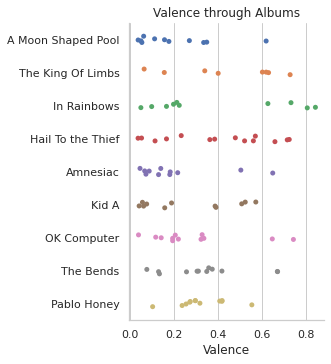

In [37]:

sns.set_theme(style='whitegrid')
sns.catplot(data=df, y='album_name', x='valence')
plt.title('Valence through Albums')
plt.ylabel('')
plt.xlabel('Valence')

Using a Boxplot, we can see how consistently sad is every album

Text(0.5, 0, 'Valence')

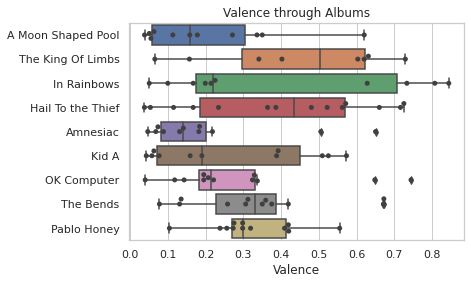

In [38]:

sns.set_theme(style='whitegrid')
axis = sns.boxplot(data= df, y= 'album_name', x='valence')
axis_2 = sns.swarmplot(data= df, y= 'album_name', x='valence', color='.25')
plt.title('Valence through Albums')
plt.ylabel('')
plt.xlabel('Valence')

Another interesting feature is danceability.

In [39]:
df.groupby('album_name').agg({'danceability':np.mean}).sort_values(by='danceability')

,danceability
album_name,
OK Computer,0.288083
Pablo Honey,0.303333
The Bends,0.333750
Kid A,0.386909
Amnesiac,0.398182
Hail To the Thief,0.429286
A Moon Shaped Pool,0.429545
In Rainbows,0.528300
The King Of Limbs,0.542625


Text(0.5, 0, 'Danceability')

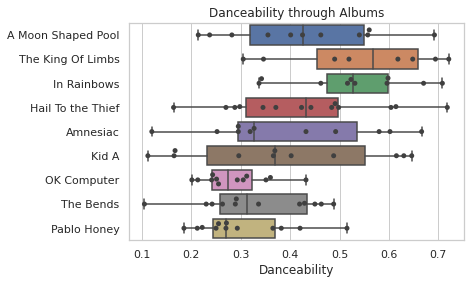

In [40]:

sns.set_theme(style='whitegrid')
axis = sns.boxplot(data= df, y= 'album_name', x='danceability')
axis_2 = sns.swarmplot(data= df, y= 'album_name', x='danceability', color='.25')
plt.title('Danceability through Albums')
plt.ylabel('')
plt.xlabel('Danceability')

Now, these results are interesting. It seems that Radiohead has increased its danceability throught its career, starting from Kid A where the band famously began to increase their output of songs with more electronic elements. We can also observe that the saddest Radiohead album is also one of the most danceable albums. So, we should visualize if there is a correlation between valence and danceability. A scatterplot should be helpful.

Text(0, 0.5, 'Valence')

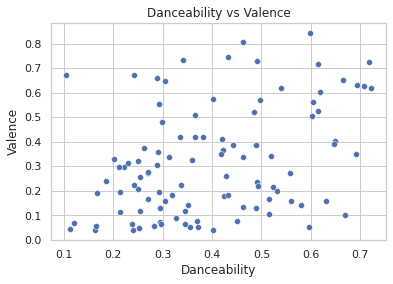

In [41]:
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df, x = 'danceability', y= 'valence')
plt.title("Danceability vs Valence")
plt.xlabel("Danceability")
plt.ylabel("Valence")

In [53]:
df[['danceability','valence']].corr()

,danceability,valence
danceability,1.000000,0.371598
valence,0.371598,1.000000


A closer inspection tell us that there is not a big correlation between a song valence and its danceability. Which is really a little counterintuitive. We should analyse the rest of the features.

<AxesSubplot:>

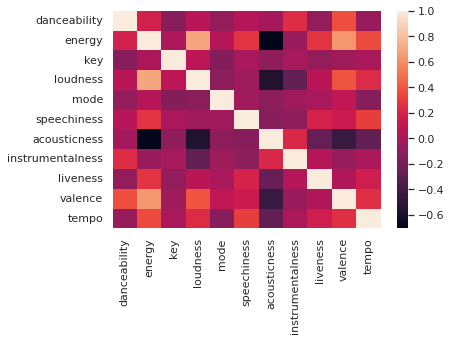

In [42]:
sns.heatmap(df.iloc[:,6:17].corr(method = 'pearson'))

<AxesSubplot:xlabel='energy', ylabel='valence'>

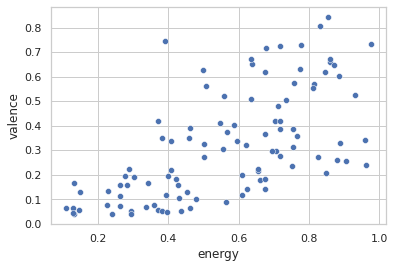

In [44]:
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df, x = 'energy', y= 'valence')

In [54]:
df[['energy','valence']].corr()

,energy,valence
energy,1.000000,0.637562
valence,0.637562,1.000000


<AxesSubplot:xlabel='loudness', ylabel='valence'>

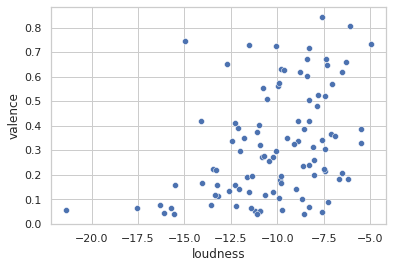

In [50]:
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df, x = 'loudness', y= 'valence')

In [55]:
df[['loudness','valence']].corr()

,loudness,valence
loudness,1.000000,0.393342
valence,0.393342,1.000000


<AxesSubplot:xlabel='acousticness', ylabel='valence'>

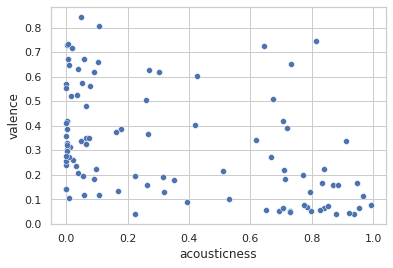

In [60]:
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df, x = 'acousticness', y= 'valence')

In [61]:
df[['acousticness','valence']].corr()

,acousticness,valence
acousticness,1.000000,-0.449108
valence,-0.449108,1.000000


<AxesSubplot:xlabel='energy', ylabel='acousticness'>

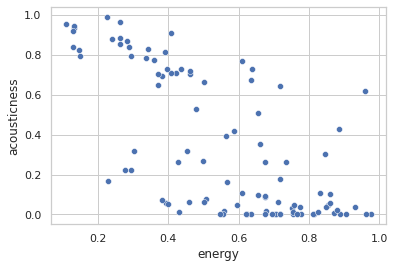

In [56]:
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df, x = 'energy', y= 'acousticness')

In [58]:
df[['energy','acousticness']].corr(method = 'pearson')

,energy,acousticness
energy,1.000000,-0.704745
acousticness,-0.704745,1.000000
